In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [32]:
# create the data for the results in each tratment group 
data= {
     'nbr_of_unique_users':[23201, 23198],
      'nbr_of_unique_activating_users':[6563,6936],
      'nbr_of_uniqe_paying_users':[375,278],
      'total_amount_paid':[54329,40112],
}

In [33]:
df_treatment = pd.DataFrame(data, index=['friend', 'trial'])

df_treatment

,nbr_of_unique_users,nbr_of_unique_activating_users,nbr_of_uniqe_paying_users,total_amount_paid
friend,23201,6563,375,54329
trial,23198,6936,278,40112


In [34]:
# create data
x_treatment = ['nbr_of_unique_users','nbr_of_unique_activating_users','nbr_of_uniqe_paying_users']
y_treatment_friend = df_treatment[['nbr_of_unique_users','nbr_of_unique_activating_users','nbr_of_uniqe_paying_users']].iloc[0].tolist()
y1_treatment_trial = df_treatment[['nbr_of_unique_users','nbr_of_unique_activating_users','nbr_of_uniqe_paying_users']].iloc[1].tolist()
  
y_treatment_friend

[23201, 6563, 375]

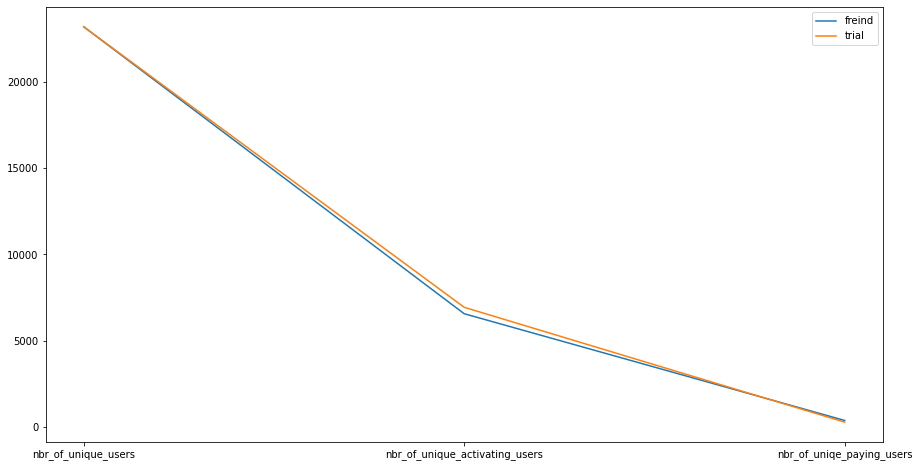

In [35]:
# plot lines
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.plot(x_treatment, y_treatment_friend, label = "freind")
plt.plot(x_treatment , y1_treatment_trial, label = "trial")
plt.legend()
plt.show()

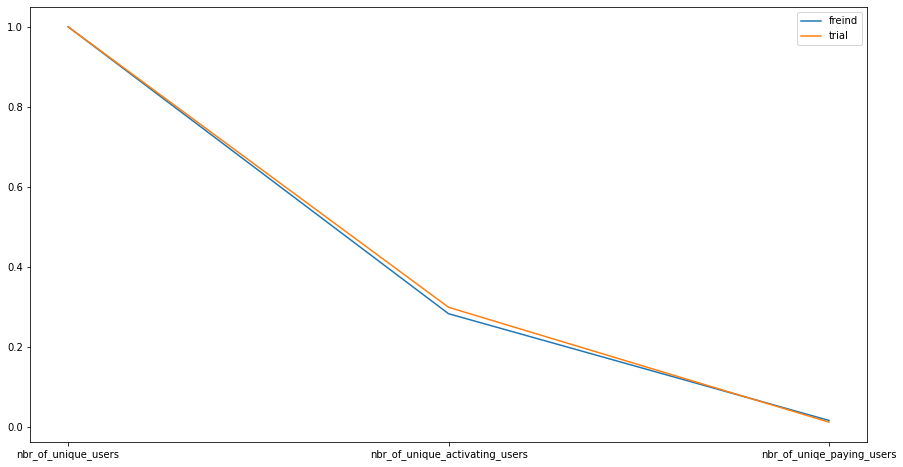

In [36]:
# plot 

df_treatment_percenatage = df_treatment[['nbr_of_unique_users','nbr_of_unique_activating_users','nbr_of_uniqe_paying_users']].div(df_treatment['nbr_of_unique_users'],axis=0)

# create data
x_treatment = ['nbr_of_unique_users','nbr_of_unique_activating_users','nbr_of_uniqe_paying_users']
y_treatment_friend = df_treatment_percenatage[['nbr_of_unique_users','nbr_of_unique_activating_users','nbr_of_uniqe_paying_users']].iloc[0].tolist()
y1_treatment_trial = df_treatment_percenatage[['nbr_of_unique_users','nbr_of_unique_activating_users','nbr_of_uniqe_paying_users']].iloc[1].tolist()
  

# plot lines
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.plot(x_treatment, y_treatment_friend, label = "freind")
plt.plot(x_treatment, y1_treatment_trial, label = "trial")
plt.legend()
plt.show()


In [37]:
df_treatment_percenatage

,nbr_of_unique_users,nbr_of_unique_activating_users,nbr_of_uniqe_paying_users
friend,1.0,0.282876,0.016163
trial,1.0,0.298991,0.011984


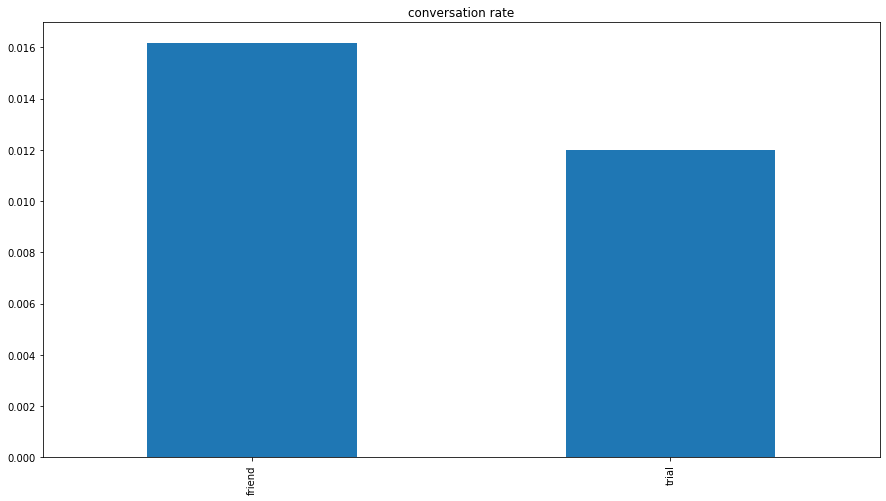

In [38]:
# plot conversation rate

df_treatment_percenatage['nbr_of_uniqe_paying_users'].plot.bar( figsize=(15,8), title = 'conversation rate')


In [39]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

n_friend = df_treatment['nbr_of_unique_users'].iloc[0]
n_trail = df_treatment['nbr_of_unique_users'].iloc[1]


successes = [df_treatment['nbr_of_uniqe_paying_users'].iloc[0], df_treatment['nbr_of_uniqe_paying_users'].iloc[1]]
total = [n_friend, n_trail]

z_stat, pval = proportions_ztest(successes, total)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, total, alpha=0.05)

print(f'p-value: {pval:.3f}')
print(f'ci 95% for friend group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for trial group: [{lower_treat:.3f}, {upper_treat:.3f}]')

p-value: 0.000
ci 95% for friend group: [0.015, 0.018]
ci 95% for trial group: [0.011, 0.013]


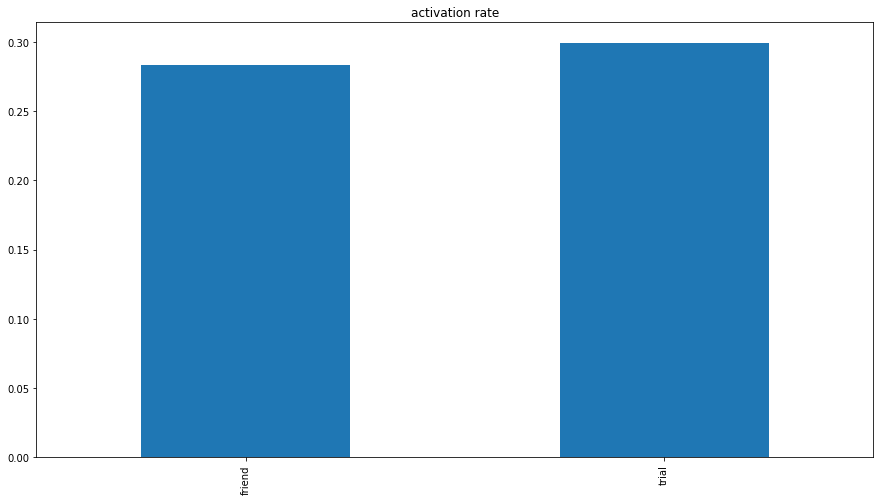

In [40]:
# plot activation rate

df_treatment_percenatage['nbr_of_unique_activating_users'].plot.bar( figsize=(15,8), title = 'activation rate')

In [12]:
#Is the result significant?

In [41]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

n_friend = df_treatment['nbr_of_unique_users'].iloc[0]
n_trail = df_treatment['nbr_of_unique_users'].iloc[1]


successes = [df_treatment['nbr_of_unique_activating_users'].iloc[0], df_treatment['nbr_of_unique_activating_users'].iloc[1]]
total = [n_friend, n_trail]

z_stat, pval = proportions_ztest(successes, total)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, total, alpha=0.05)


print(f'p-value: {pval:.3f}')
print(f'ci 95% for friend group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for trial group: [{lower_treat:.3f}, {upper_treat:.3f}]')


p-value: 0.000
ci 95% for friend group: [0.277, 0.289]
ci 95% for trial group: [0.293, 0.305]


### DF funnel Results 

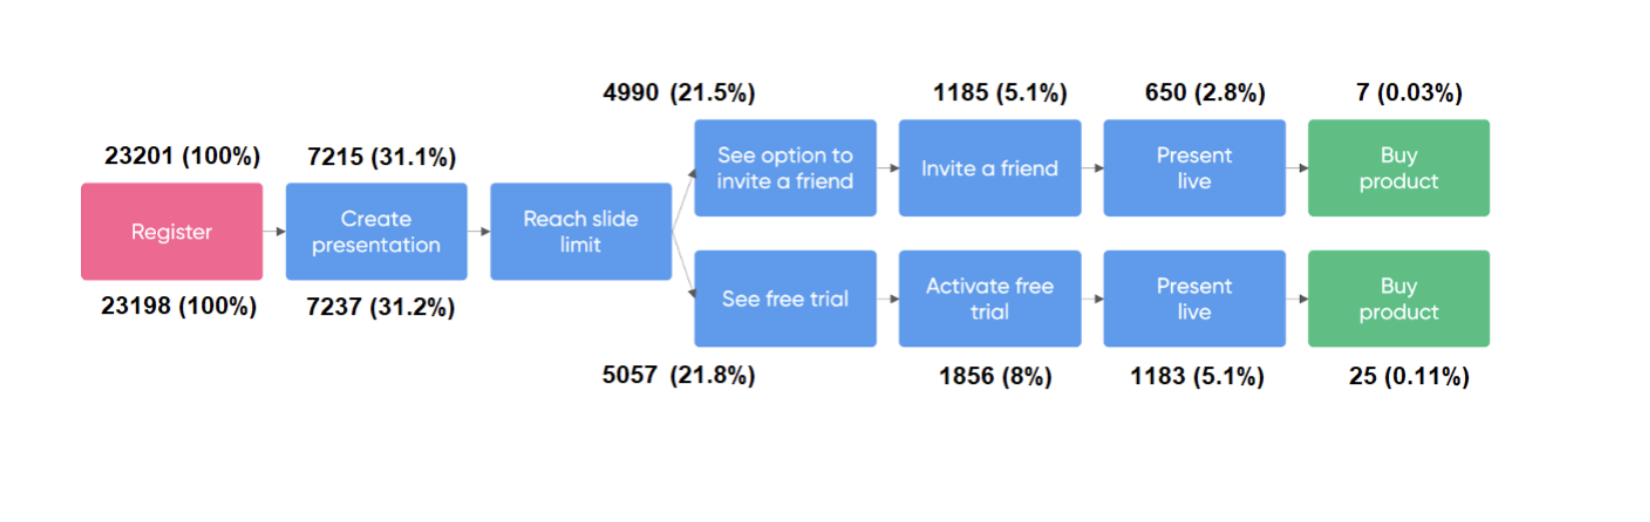

In [42]:
data_funnel = {
     'register':[23201, 23198],
      'create_presentation':[7215,7237],
      'see_option_A_B':[4990, 5057],
      'act_on_option_A_B':[1185,1856],
      'present_live':[650,1183],
      'buy_product':[7,25],
}


In [43]:
df_funnel = pd.DataFrame(data_funnel,index=['friend', 'trial'])

df_funnel

,register,create_presentation,see_option_A_B,act_on_option_A_B,present_live,buy_product
friend,23201,7215,4990,1185,650,7
trial,23198,7237,5057,1856,1183,25


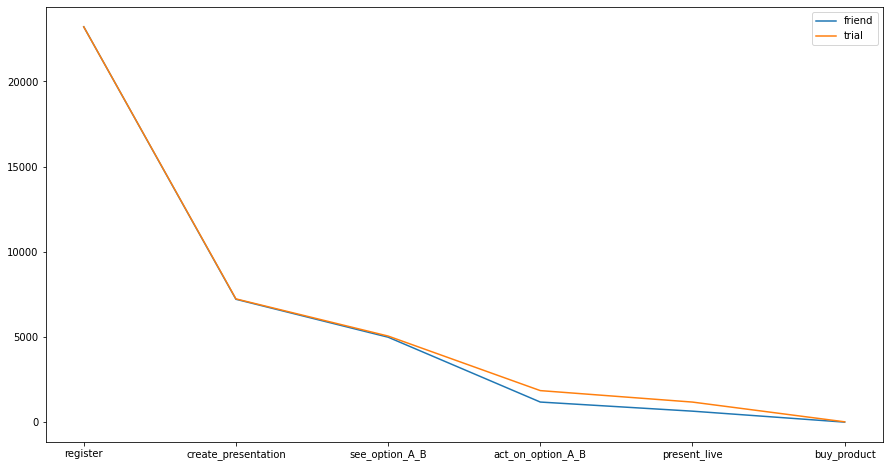

In [44]:
# values on x-axis
x_funnel = ['register','create_presentation','see_option_A_B', 'act_on_option_A_B', 'present_live', 'buy_product' ]
# values on y-axis
y_funnel_friend = df_funnel[['register','create_presentation','see_option_A_B', 'act_on_option_A_B', 'present_live', 'buy_product']].iloc[0].tolist()
y1_funnel_trial = df_funnel[['register','create_presentation','see_option_A_B', 'act_on_option_A_B', 'present_live', 'buy_product']].iloc[1].tolist()


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

# plotting a line plot with it's default size
plt.plot(x_funnel, y_funnel_friend, label = 'friend')
plt.plot(x_funnel, y1_funnel_trial, label = 'trial')
plt.legend()
plt.show()


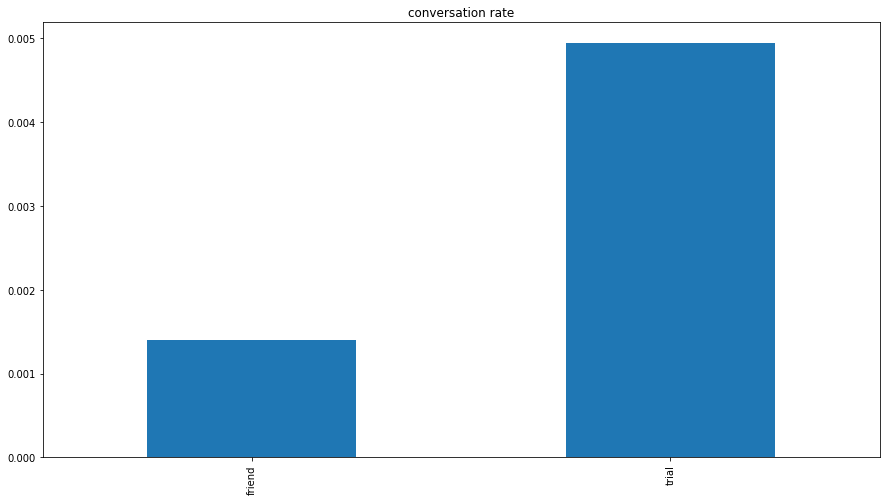

In [45]:
#plot conversation rate
df_funnel_percentage = df_funnel[['register','create_presentation','see_option_A_B', 'act_on_option_A_B', 'present_live', 'buy_product']].div(df_funnel['see_option_A_B'],axis=0)
df_funnel_percentage['buy_product'].plot.bar( figsize=(15,8), title = 'conversation rate')

In [46]:
#is rhe result significant?

In [47]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

n_friend = df_funnel['see_option_A_B'].iloc[0]
n_trail = df_funnel['see_option_A_B'].iloc[1]


successes = [df_funnel['buy_product'].iloc[0], df_funnel['buy_product'].iloc[1]]
total = [n_friend, n_trail]

z_stat, pval = proportions_ztest(successes, total)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, total, alpha=0.05)

print(f'p-value: {pval:.3f}')
print(f'ci 95% for friend group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for trail group: [{lower_treat:.3f}, {upper_treat:.3f}]')


p-value: 0.002
ci 95% for friend group: [0.000, 0.002]
ci 95% for trail group: [0.003, 0.007]


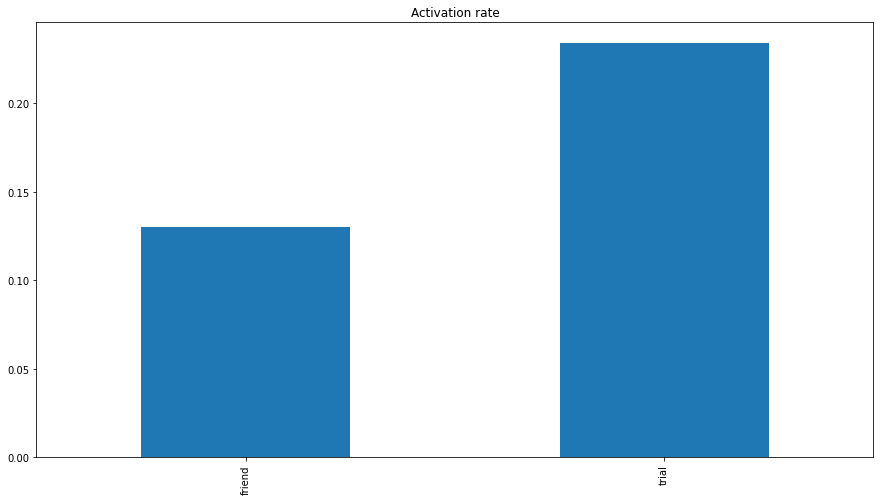

In [48]:
#plot activation rate
df_funnel_percentage = df_funnel[['register','create_presentation','see_option_A_B', 'act_on_option_A_B', 'present_live', 'buy_product']].div(df_funnel['see_option_A_B'],axis=0)
df_funnel_percentage['present_live'].plot.bar( figsize=(15,8), title = 'Activation rate')

In [49]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

n_friend = df_funnel['see_option_A_B'].iloc[0]
n_trail = df_funnel['see_option_A_B'].iloc[1]


successes = [df_funnel['present_live'].iloc[0], df_funnel['present_live'].iloc[1]]
total = [n_friend, n_trail]

z_stat, pval = proportions_ztest(successes, total)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, total, alpha=0.05)


print(f'p-value: {pval:.3f}')
print(f'ci 95% for friend group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for trail group: [{lower_treat:.3f}, {upper_treat:.3f}]')

p-value: 0.000
ci 95% for friend group: [0.121, 0.140]
ci 95% for trail group: [0.222, 0.246]
